In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
trainData=pd.read_csv('train.csv')
testData = pd.read_csv("test.csv")
###############################################

trainData.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [2]:
testData.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [3]:
trainData.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [5]:
trainData.drop(['belongs_to_collection','id'], axis=1, inplace=True)
testData.drop(['belongs_to_collection','id'], axis=1, inplace=True)

(array([2.411e+03, 3.630e+02, 1.230e+02, 5.500e+01, 2.000e+01, 1.700e+01,
        7.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00e+00, 3.80e+07, 7.60e+07, 1.14e+08, 1.52e+08, 1.90e+08,
        2.28e+08, 2.66e+08, 3.04e+08, 3.42e+08, 3.80e+08]),
 <BarContainer object of 10 artists>)

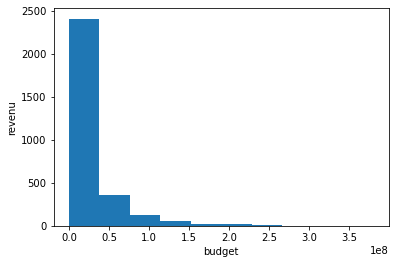

In [6]:

plt.xlabel( 'budget')
plt.ylabel('revenu')
plt.hist(trainData['budget'])

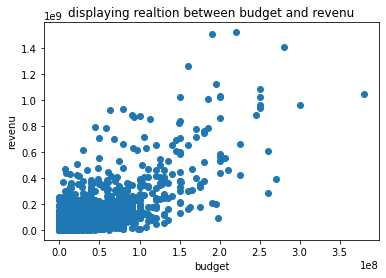

In [7]:
plt.title('displaying realtion between budget and revenu')
plt.xlabel( 'budget')
plt.ylabel('revenu')
plt.scatter(x=trainData['budget'], y=trainData['revenue'])

In [8]:
print(len(trainData[trainData['budget'] == 0]))

812


In [9]:
trainData['budget'] = trainData['budget'].replace(0, trainData['budget'].mean())

In [10]:
print(len(trainData[trainData['budget'] == 0]))

0


In [11]:
gn = pd.DataFrame(columns=['genre_name'])
gn

,genre_name


In [12]:
trainData = pd.concat([trainData, gn], axis=1)
testData = pd.concat([testData, gn], axis=1)

trainData.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name
0,14000000.00,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,NaN
1,40000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,NaN
2,3300000.00,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,NaN
3,1200000.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,NaN
4,22531334.11,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN


In [13]:
j = 0
for i in trainData['genres']:
    d = get_dict(i)
    if d != {}:
        trainData['genre_name'][j] = d[0]['name'] 
    else:
         trainData['genre_name'][j] = np.NaN
    j += 1

j = 0
for i in testData['genres']:
    d = get_dict(i)
    if d != {}:
        testData['genre_name'][j] = d[0]['name'] 
    else:
         testData['genre_name'][j] = np.NaN
    j += 1
trainData.drop(['genres'], axis=1, inplace=True)
testData.drop(['genres'], axis=1, inplace=True)
trainData.head()


C:\Users\mercy\AppData\Local\Temp/ipykernel_14268/194901383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_name'][j] = d[0]['name']
C:\Users\mercy\AppData\Local\Temp/ipykernel_14268/194901383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_name'][j] = np.NaN
C:\Users\mercy\AppData\Local\Temp/ipykernel_14268/194901383.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['genre_name'][j

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name
0,14000000.00,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy
1,40000000.00,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy
2,3300000.00,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama
3,1200000.00,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller
4,22531334.11,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action


In [14]:

testData['homepage'].isnull().sum()

2978

In [15]:
trainData['homepage'].isnull().sum()

2054

In [16]:
Homepage=pd.DataFrame(columns=['Homepage'])
trainData=pd.concat([trainData,Homepage],axis=1)
testData=pd.concat([testData,Homepage],axis=1)

In [17]:
j = 0
for i in trainData['homepage']:
    if str(trainData['homepage'][j]) == 'nan':
        trainData['Homepage'][j] = 0
    else:
        trainData['Homepage'][j] = 1
    j += 1

j = 0
for i in testData['homepage']:
    if str( testData['homepage'][j]) == 'nan':
         testData['Homepage'][j] = 0
    else:
         testData['Homepage'][j] = 1
    j += 1
trainData.head()

C:\Users\mercy\AppData\Local\Temp/ipykernel_14268/3964125983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Homepage'][j] = 0
C:\Users\mercy\AppData\Local\Temp/ipykernel_14268/3964125983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Homepage'][j] = 1
C:\Users\mercy\AppData\Local\Temp/ipykernel_14268/3964125983.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['Homepage'][j] = 1
C:\Users\merc

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage
0,14000000.00,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0
1,40000000.00,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0
2,3300000.00,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1
3,1200000.00,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1
4,22531334.11,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0


In [18]:
trainData.drop(['homepage'], axis=1, inplace=True)
testData.drop(['homepage'], axis=1, inplace=True)
trainData["Homepage"].head()


0    0
1    0
2    1
3    1
4    0
Name: Homepage, dtype: object

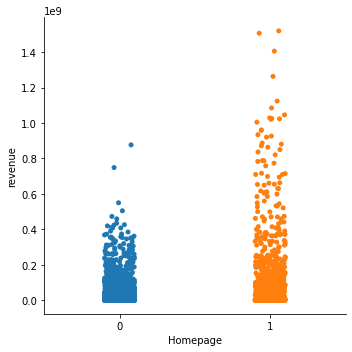

In [19]:

sns.catplot(x='Homepage',y='revenue',data=trainData)





In [20]:
#imbd_id

In [21]:
trainData.drop(['imdb_id'], axis=1, inplace=True)
testData.drop(['imdb_id'], axis=1, inplace=True)


In [22]:
#original_language	

In [23]:
for i,e in enumerate(trainData['original_language'][:5]):
    print(i,e)

0 en
1 en
2 en
3 hi
4 ko


C:\Users\mercy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='original_language', ylabel='revenue'>

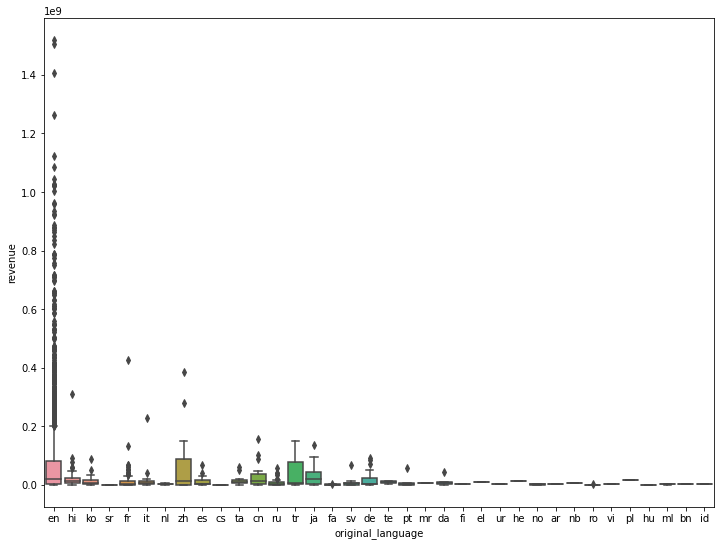

In [24]:
plt.subplots(figsize=(12, 9))
sns.boxplot('original_language','revenue',data=trainData)



In [25]:

for i in trainData['original_language']:
    if(i=='en'):
        trainData['Has_En']=1
    else:
        trainData['Has_En']=0
for i in testData['original_language']:
    if(i=='en'):
        testData['Has_En']=1
    else:
        testData['Has_En']=0

trainData.head()


,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,status,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage,Has_En
0,14000000.00,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0,1
1,40000000.00,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0,1
2,3300000.00,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1,1
3,1200000.00,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1,1
4,22531334.11,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0,1


In [26]:
#original_title $ overview

In [27]:
trainData.drop(['original_title'], axis=1, inplace=True)
testData.drop(['overview'], axis=1, inplace=True)

In [28]:
#popularity	

In [29]:
trainData['popularity'].isnull().sum()

0

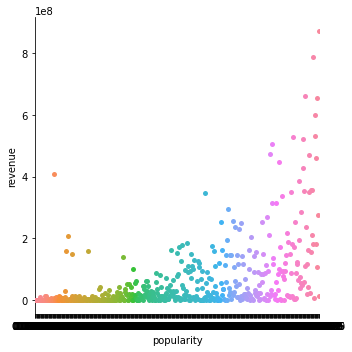

In [30]:
sns.catplot(x='popularity',y='revenue',data=trainData[:500])


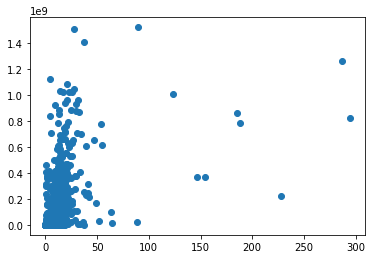

In [31]:
plt.scatter('popularity','revenue',data=trainData)

plt.show()

In [32]:
#genres
#print('Number of genres in films')
#trainData['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts() 
###Ahmed work

In [33]:
###status
trainData['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [34]:
testData['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

### This feature is not useful most of them are already released 

In [35]:
trainData.drop(['status'], axis=1, inplace=True)
testData.drop(['status'], axis=1, inplace=True)

## tagline

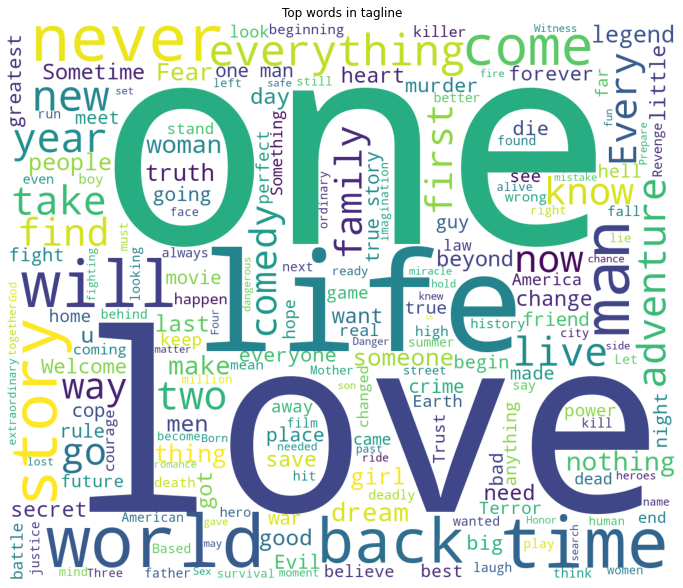

In [36]:
plt.figure(figsize = (12, 12))
text = ' '.join(trainData['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

##  from this figure it's shown most films contains comedy  , drama related words.

## title will be dropped not important

In [42]:
trainData.drop(['title'], axis=1, inplace=True)
testData.drop(['title'], axis=1, inplace=True)

KeyError: "['title'] not found in axis"

## keywords

In [38]:
trainData['Keywords'].value_counts()

[{'id': 10183, 'name': 'independent film'}]                                                                                                                                                                                                                                                                                                                                                                                                                                      27
[{'id': 187056, 'name': 'woman director'}]                                                                                                                                                                                                                                                                                                                                                                                                                                       19
[{'id': 179431, 'name': 'duringcreditsstinger'}]                

In [39]:
#trainData['Keywords'].astype(object)

In [40]:
print('Number of Keywords in films')
#needs to be revised
trainData['Keywords'].apply(lambda x: len(str(x)) if x != {} else 0).value_counts().head(10)

Number of Keywords in films


3      276
43      30
42      25
70      19
35      17
33      16
171     16
107     16
34      15
142     15
Name: Keywords, dtype: int64

In [66]:
#can't make it work
#list_of_keywords = list(trainData['Keywords'].apply(lambda x: [ i[1] for i in str(x)] if x != {} else []).values)


Hello


5


In [ ]:
#temp code below

In [ ]:

trainData.genres= trainData.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
trainData.head()

In [ ]:
trainData['id_geners'] = trainData['genres'].str.split(',', expand=True)[0]
trainData['genres_Nam'] = trainData['genres'].str.split(',', expand=True)[1]
trainData['genres_ID'] = trainData['id_geners'].str.split(':', expand=True)[1]
trainData['genres_Name'] = trainData['genres_Nam'].str.split(':', expand=True)[1]
#trainData['genres_Id'] = trainData['genres'].str.split(',', expand=True)[0]

trainData['genres_Name'] = trainData['genres_Name'].str.replace('}', '')
trainData['genres_Name'] = trainData['genres_Name'].str.replace(']', '')
trainData.drop(['genres_Nam','id_geners','genres'], axis=1, inplace=True)

trainData['genres_Name'] = trainData['genres_Name'].str.replace(']', '')
trainData.head()

In [ ]:
trainData['Day'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[0]
trainData['Month'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[1]
trainData['Year'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[2]
trainData['Day'] = trainData['Day'].astype(int)
trainData['Month'] = trainData['Month'].astype(int)
trainData['Year'] = trainData['Year'].astype(int)
trainData.drop(['release_date','tagline','Keywords'] ,axis=1 ,inplace=True)
trainData.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
def Feature_Encoder(trainData,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(trainData[c].values))
        trainData[c] = lbl.transform(list(trainData[c].values))
    return trainData
cols={'original_language','genres_Name','original_title','overview','poster_path','title'}
trainData=Feature_Encoder(trainData,cols)
trainData.head()

In [ ]:
# Converting nominal trainData to numberical trainData 
trainData[['status','tagline', 
      'original_language', 
      'production_companies', 
      'production_countries']] =trainData[['status', 
               'original_language', 
               'production_companies',
               'production_countries']].astype('category')

trainData['status'] = trainData['status'].cat.codes
trainData['original_language'] = trainData['original_language'].cat.codes
trainData['production_companies'] = trainData['production_companies'].cat.codes
trainData['production_countries'] = trainData['production_countries'].cat.codes
trainData.head()

In [ ]:


trainData['genersCount'] = trainData['spoken_languages'].str.count(',') + 1
trainData.cast = trainData.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
trainData.crew = trainData.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

trainData['cast_count'] = trainData['cast'].str.count(',') + 1
trainData['crew_count'] = trainData['crew'].str.count(',') + 1
trainData.head()

In [ ]:

trainData['runtime']=trainData['runtime'].fillna(trainData['runtime'].mean())

In [ ]:
trainData.isnull().sum()